> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

Shape of DataFrame

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Data types of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Find the columns with/without missing data

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_q1 = df.iloc[:, np.r_[0, 2, 12, 16:21]].copy()
df_q1.head()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id              10866 non-null int64
popularity      10866 non-null float64
runtime         10866 non-null int64
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(4)
memory usage: 679.2 KB


Create a DataFrame with features related to Question 1

In [8]:
df_q2 = df.iloc[:, np.r_[2, 13]].copy()
df_q2.head()

,popularity,genres
0,32.985763,Action|Adventure|Science Fiction|Thriller
1,28.419936,Action|Adventure|Science Fiction|Thriller
2,13.112507,Adventure|Science Fiction|Thriller
3,11.173104,Action|Adventure|Science Fiction|Fantasy
4,9.335014,Action|Crime|Thriller


Create a DataFrame with features related to Question 2

In [9]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 2 columns):
popularity    10866 non-null float64
genres        10843 non-null object
dtypes: float64(1), object(1)
memory usage: 127.4+ KB


In [10]:
df_q2.dropna(inplace=True)
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 2 columns):
popularity    10843 non-null float64
genres        10843 non-null object
dtypes: float64(1), object(1)
memory usage: 211.8+ KB


Drop rows with any null data

In [11]:
df_q2 = pd.concat([pd.Series(row['popularity'], row['genres'].split('|')) for _, row in df_q2.iterrows()]).reset_index()
df_q2.columns = ['genres', 'popularity']
df_q2.genres = df_q2.genres.str.replace(' ', '_')
df_q2.head(10)

,genres,popularity
0,Action,32.985763
1,Adventure,32.985763
2,Science_Fiction,32.985763
3,Thriller,32.985763
4,Action,28.419936
5,Adventure,28.419936
6,Science_Fiction,28.419936
7,Thriller,28.419936
8,Adventure,13.112507
9,Science_Fiction,13.112507


Split the genres to seperate rows. Reference: https://stackoverflow.com/a/12681217

In [12]:
df_q2.genres.unique()

array(['Action', 'Adventure', 'Science_Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV_Movie', 'Foreign'], dtype=object)

Get the movie genres

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: How many movies are released every year and what's the relationship between average vote rating and revenue?

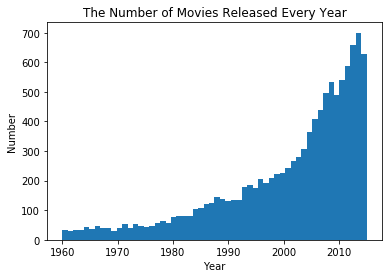

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_q1['release_year'].plot(kind='hist', bins=len(df_q1['release_year'].unique()))
plt.title('The Number of Movies Released Every Year')
plt.xlabel('Year')
plt.ylabel('Number');

From the above histogram, we find that more and more movies are released over time.

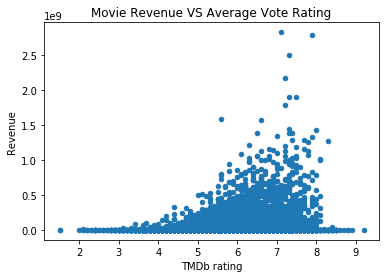

In [14]:
df_q1.plot(x='vote_average', y='revenue_adj', kind='scatter')
plt.title('Movie Revenue VS Average Vote Rating')
plt.xlabel('TMDb rating')
plt.ylabel('Revenue');

From the above scatter plot, we find that movies with higher ratings usually get more revenue.

### Research Question 2: What is the most popular movie genre?

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_new = df_q2.groupby(['genres'], as_index=False).mean()
df_sorted = df_new.sort_values(by=['popularity'])
df_sorted

,genres,popularity
5,Documentary,0.181432
9,Foreign,0.191496
16,TV_Movie,0.270896
11,Horror,0.465357
12,Music,0.487321
10,History,0.575936
19,Western,0.590615
6,Drama,0.591496
14,Romance,0.592082
3,Comedy,0.592607


Sort the movie genres based on mean popularity

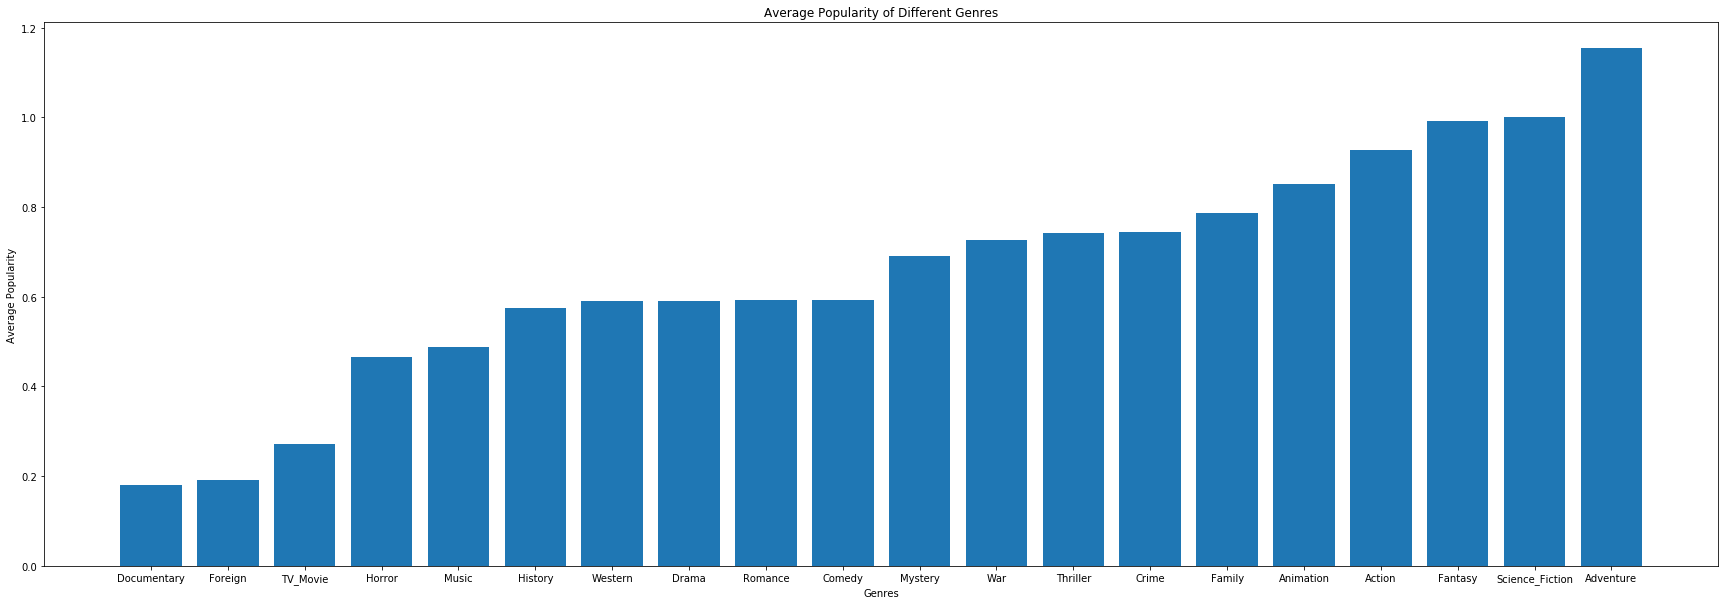

In [16]:
plt.figure(figsize=(30,10))
x = np.arange(len(df_sorted))
plt.bar(x, df_sorted['popularity'])
plt.xticks(x, df_sorted['genres'])
plt.title('Average Popularity of Different Genres')
plt.xlabel('Genres')
plt.ylabel('Average Popularity');

From the above bar plot, we find that adventure is the most popular movie genre.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In summary, we find that the number of movies released per year is increasing over time and movies with higher TMDb ratings usually have more revenue. We also find that adventure is the most popular genre among all movie genres.

We should notice that the genres column of the original dataframe contains 23 null data. These movies were neglected when we caculated the average popularity of genres, which may change the result slightly. Moreover, vote count was not considered when we studied the relationship between revenue and vote rating. TMDb rating with low vote count may not be accurate enough to reflect the true rating.

There are some other potential areas to explore. For example, the relationship between revenue and other features like budget, release year, cast, director, and so forth.